# Keypoint Detectors

min_num = 14
max_num = 297

min_min_size = 1.79669
max_min_size = 31.0

min_max_size = 4.0
max_max_size = 111.079

min_mean_size = 4.0
max_mean_size = 4.0



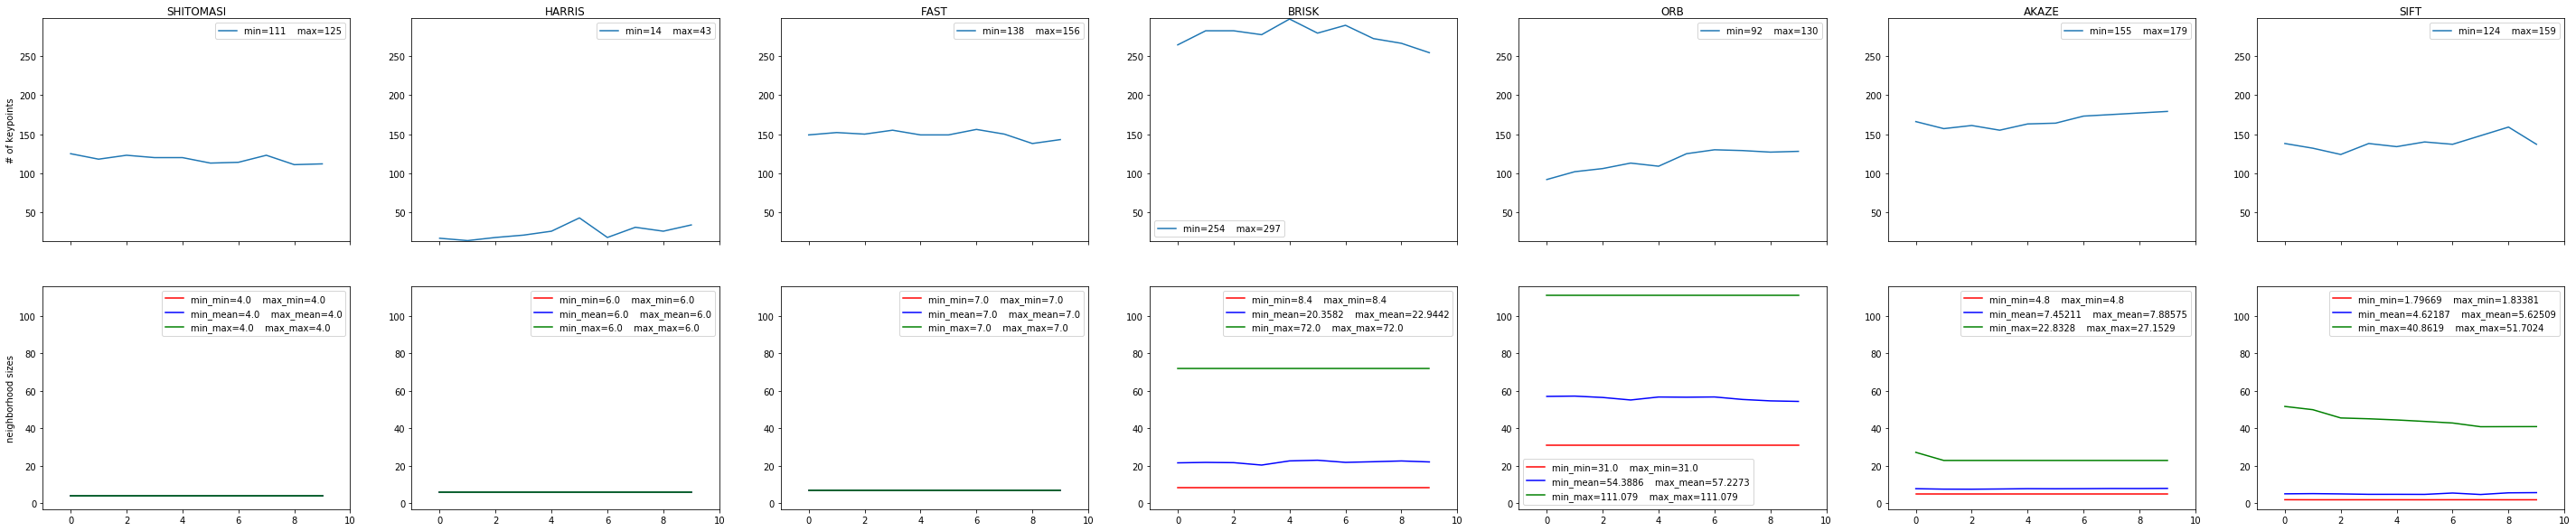

In [85]:
import os
import csv
import matplotlib.pyplot as plt

root_dir = "cmake-build-debug"

names = ["SHITOMASI", "HARRIS", "FAST", "BRISK", "ORB", "AKAZE", "SIFT"]
images = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data = dict()

# read data
class LineWrapper:
    def __init__(self, lst):
        self._lst = lst
        
    def num(self):
        return int(self._lst[0])
    
    def min_size(self):
        return float(self._lst[1])
    
    def max_size(self):
        return float(self._lst[2])
    
    def mean_size(self):
        return float(self._lst[3])

min_num  = 999999999
max_num  = 0

min_min_size = 999999999
max_min_size = 0

min_max_size = 999999999
max_max_size = 0

min_mean_size = 999999999
max_mean_size = 0

for name in names:
    with open(os.path.join(root_dir, name + '_keypoints_number.txt')) as f:
        csv_reader = csv.reader(f, delimiter=' ')
        
        data[name] = { 'num': [], 'min': [], 'max': [], 'mean': [] }
        for row in csv_reader:
            lw = LineWrapper(row)
            data[name]['num'].append(lw.num())
            data[name]['min'].append(lw.min_size())
            data[name]['max'].append(lw.max_size())
            data[name]['mean'].append(lw.mean_size())
            
            min_num = min(min_num, lw.num())
            max_num = max(max_num, lw.num())

            min_min_size = min(min_min_size, lw.min_size())
            max_min_size = max(max_min_size, lw.min_size())

            min_max_size = min(min_max_size, lw.max_size())
            max_max_size = max(max_max_size, lw.max_size())
            
            min_mean_size = min(min_mean_size, lw.mean_size())
            max_mean_size = max(max_mean_size, lw.mean_size())
            
            
fig, axes = plt.subplots(nrows=2, ncols=len(names), 
                         sharex=True, sharey=False, 
                         figsize=(50, 10))

for i, name in enumerate(names):
    # number of keypoints
    axes[0][i].plot(images, data[name]['num'], label="min="+str(min(data[name]['num']))+"    max="+str(max(data[name]['num'])))
    axes[0][i].set_ylim(min_num - 1, max_num + 1)
    axes[0][i].set_xlim(-1, 10)
    axes[0][i].set_title(name)
    axes[0][i].legend()
    
    # keypoints' neigbourhood sizes
    axes[1][i].plot(images, data[name]['min'], color='red', label="min_min="+str(min(data[name]['min']))+"    max_min="+str(max(data[name]['min'])))
    axes[1][i].plot(images, data[name]['mean'], color='blue', label="min_mean="+str(min(data[name]['mean']))+"    max_mean="+str(max(data[name]['mean'])))
    axes[1][i].plot(images, data[name]['max'], color='green', label="min_max="+str(min(data[name]['max']))+"    max_max="+str(max(data[name]['max'])))
    axes[1][i].set_ylim(min_min_size - 5, max_max_size + 5)
    axes[1][i].set_xlim(-1, 10)
    axes[1][i].legend()
    
axes[0][0].set_ylabel('# of keypoints')
axes[1][0].set_ylabel('neighborhood sizes')

fig.show()

# print min/max statistics among all images and detectors
string = \
"""\
min_num = {min_num}
max_num = {max_num}

min_min_size = {min_min_size}
max_min_size = {max_min_size}

min_max_size = {min_max_size}
max_max_size = {max_max_size}

min_mean_size = {min_mean_size}
max_mean_size = {min_mean_size}
"""\
.format(min_num=min_num,
        max_num=max_num,
        min_min_size=min_min_size, 
        max_min_size=max_min_size,
        min_max_size=min_max_size,
        max_max_size=max_max_size,
        min_mean_size=min_mean_size,
        max_mean_size=min_mean_size)
print(string)